# Facemap 1.0 Keypoints Prediction in colab with a GPU

Framework for predicting neural activity from mouse orofacial movements tracked using a pose estimation model. Package also includes singular value decomposition (SVD) of behavioral videos.

***Facemap code: Carsen Stringer & Atika Syeda***

[Link to Paper](https://www.biorxiv.org/content/10.1101/2022.11.03.515121v1)

Github Repo: https://github.com/MouseLand/facemap

This tutorials shows how to process keypoints using Facemap. For more information on the Pose class see [here](https://github.com/MouseLand/facemap/blob/main/facemap/pose/pose.py)

<a href="https://colab.research.google.com/github/MouseLand/facemap/blob/dev/notebooks/process_keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

We will first install Facemap, check the GPU is working, and mount google drive to access videos.

## Configuration and Installation

Make sure you have GPU access enabled by going to Edit -> Notebook settings -> Hardware accelerator and selecting GPU



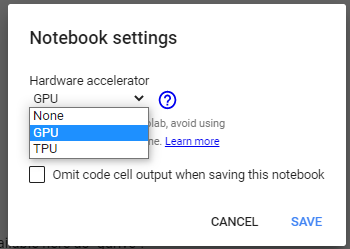

Install Facemap -- by default the torch GPU version is installed in COLAB notebook.

In [ ]:
!pip install facemap[gui]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.0/961.0 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.9 MB/s eta 0:00:00


Check CUDA version and that GPU is working.

In [ ]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from facemap.pose import pose
from glob import glob

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
Fri Jul  7 13:39:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |       

## Mount google drive

Please mount your google drive.

In [ ]:
#@markdown ###Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###**How to get google drive path to your video(s)**

The above step allows this colab notebook to access your files from google drive. Now, you need the path of your folder containing the video(s). On the left of your notebook you will see a file icon:

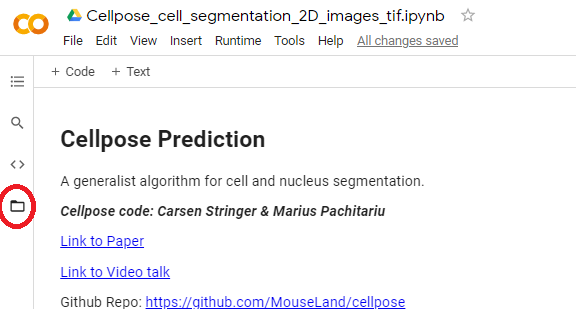

Click on the icon and it will give you:

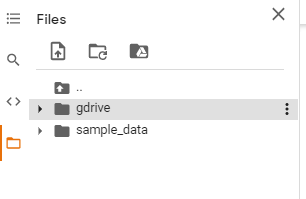

Your Google drive is under "gdrive". Click on the triangle icon on left of gdrive and it will be a dropdown view of your whole drive. Navigate to the folder containing your images. Once you are there, click on the three dots and select "Copy Path"

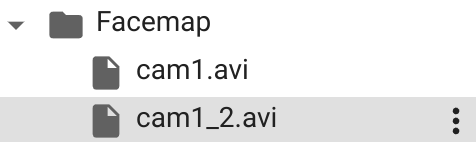

## Pose estimation

The pose model can be initialized with the following parameters:

**filenames**: (2D-list)
    List of filenames to be processed.

**bbox**: (list)
    Bounding box for cropping the video [x1, x2, y1, y2]. If not set, the entire frame is used.

**bbox_set**: (bool)
    Flag to indicate whether the bounding box has been set. Default is False.

**resize**: (bool)
    Flag to indicate whether the video needs to be resized.

**add_padding**: (bool)
    Flag to indicate whether the video needs to be padded. Default is False.

**gui**: (object)
    GUI object.

**GUIobject**: (object)
    GUI mainwindow object.

**net**: (object)
    PyTorch model object.

**model_name**: (str)
    Name of the model to be used for pose estimation. Default is None which uses the pre-trained model.


### Process single video

In [ ]:
#@markdown ###Enter directory path to video:
filepath = "/content/gdrive/MyDrive/Facemap/cam1.avi" #@param {type:"string"}

#@markdown ###### File extension must be one of: *.mp4 *.avi *.mj2 *.mkv *.mpeg *.mpg *.asf *m4v

#@markdown ##### Save Directory will be created in the input path under Masks


In [ ]:
#@markdown ###Run pose estimation on single video

# Initialize pose model.
model = pose.Pose(filenames=[[filepath]])

# process video and save results
model.run()

### Process batch of videos

To process a batch of videos using the same model and parameter settings, set `filenames` to a list of video files and run the following:

In [1]:
#@markdown ###Enter directory path to video:
fileslist = ["/content/gdrive/MyDrive/Facemap/cam1.avi", "/content/gdrive/MyDrive/Facemap/cam1_2.avi"]  #@param {type:"raw"}

#@markdown ###### File extension must be one of: *.mp4 *.avi *.mj2 *.mkv *.mpeg *.mpg *.asf *m4v

#@markdown ##### Save Directory will be created in the input path under Masks


In [ ]:
#@markdown ###Run pose estimation on batch of videos (sequentially)
# Initialize pose model
model = pose.Pose(filenames=[fileslist])
model.run()

Next, use the [Facemap GUI](https://github.com/MouseLand/facemap/blob/main/docs/pose_tracking_gui_tutorial.md#visualize-keypoints) to view keypoints tracking on video. 